# Importing libraries

In [13]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# LOADING DATASET

In [2]:
client_train = pd.read_csv("/Users/da_m1_18/Desktop/client_train.csv",low_memory=False)
invoice_train = pd.read_csv("/Users/da_m1_18/Desktop/invoice_train.csv", low_memory=False)


In [3]:
client_train.head(5)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [4]:
invoice_train.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [11]:
#compare size of the various datasets
print(client_train.shape, invoice_train.shape, invoice_train.shape)

(135493, 6) (4476749, 16) (4476749, 16)


# Data Preparation

In [ ]:
#CHECKING NULL VALUES 
print('Number of missing rows in invoice_train:',invoice_train.isna().sum().sum())
print('Number of missing rows in client_train:',client_train.isna().sum().sum())


Number of missing rows in invoice_train: 0
Number of missing rows in client_train: 0


In [ ]:
#CHECKING UNIQUE VALUES 
print('Number of unique values in invoice_train:')
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

Number of unique values in invoice_train:
client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 12
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [9]:
print(invoice_train.dtypes)


client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object


# Explotary Data Analysis

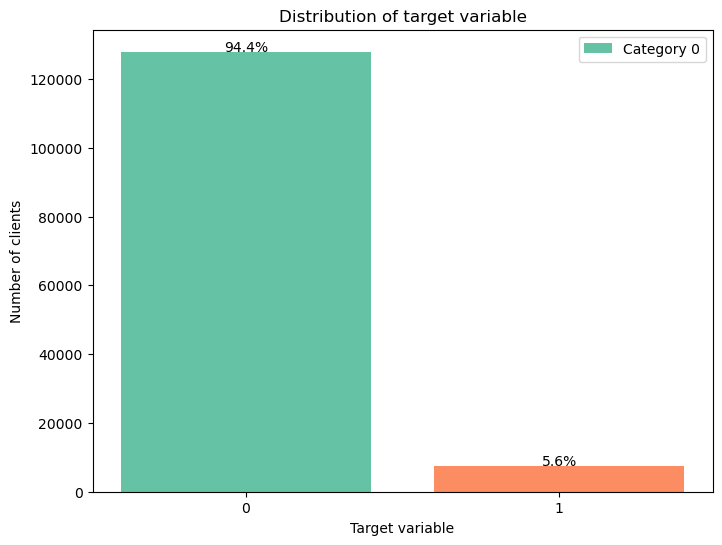

In [30]:
ds = client_train.groupby(['target'])['client_id'].count()
percentages = [100 * count / sum(ds) for count in ds]

colors = ['#66c2a5', '#fc8d62']
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=['0', '1'], height=ds.values, color=colors)

# Add axis labels and a title
ax.set_xlabel('Target variable')
ax.set_ylabel('Number of clients')
ax.set_title('Distribution of target variable')

# Add a legend
ax.legend(['Category 0', 'Category 1'])

# Add percentage labels above each bar
for i, v in enumerate(percentages):
    ax.text(i, ds.values[i]+50, f'{v:.1f}%', ha='center')

# Show the plot
plt.show()

In [31]:
def add_percentage_labels(plot, total_count):
    for patch in plot.patches:
        # Get the height and width of each bar in the plot
        height = patch.get_height()
        width = patch.get_width()

        # Calculate the percentage of the total count represented by this bar
        percentage = (height / total_count) * 100

        # Add the percentage label to the plot
        plot.annotate('{:.1f}%'.format(percentage), (patch.get_x() + width / 2, patch.get_y() + height * 1.02), ha="center")


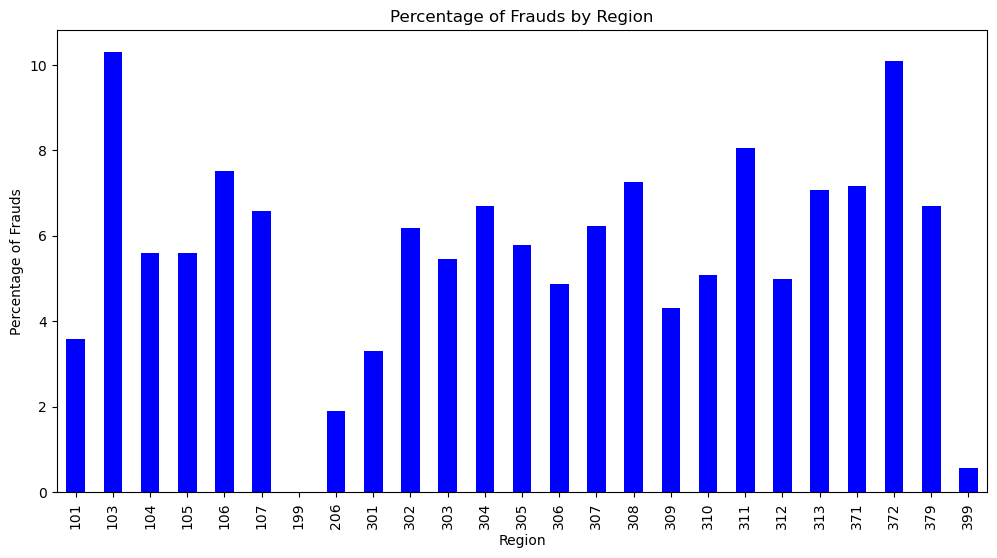

In [32]:
# Calculate the percentage of frauds by region
fraud_pct = client_train.groupby("region")["target"].mean() * 100

# Create a bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
fraud_pct.plot(kind="bar", ax=ax, color="blue")
ax.set_xlabel("Region")
ax.set_ylabel("Percentage of Frauds")
ax.set_title("Percentage of Frauds by Region")
plt.show()


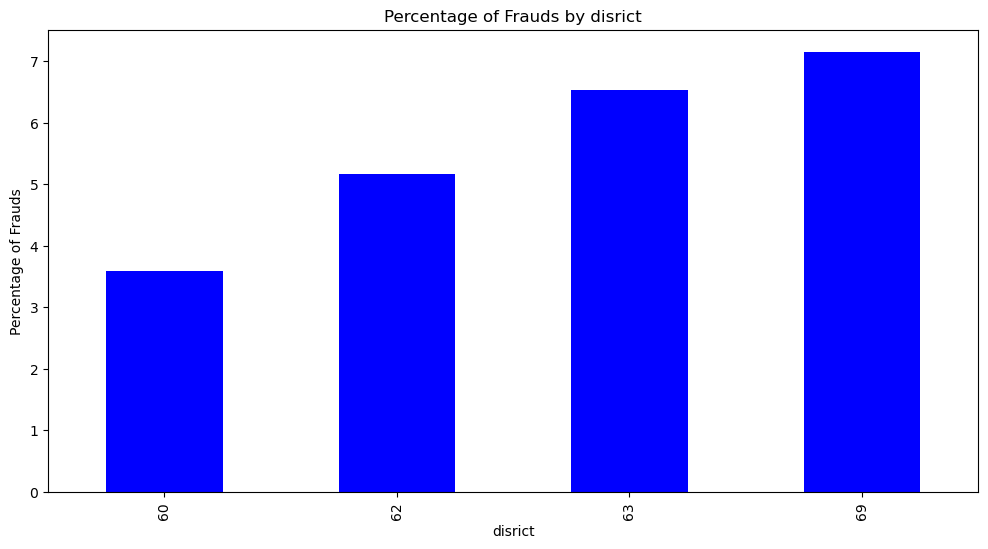

In [33]:
# Calculate the percentage of frauds by region
fraud_pct = client_train.groupby("disrict")["target"].mean() * 100

# Create a bar chart using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
fraud_pct.plot(kind="bar", ax=ax, color="blue")
ax.set_xlabel("disrict")
ax.set_ylabel("Percentage of Frauds")
ax.set_title("Percentage of Frauds by disrict")
plt.show()

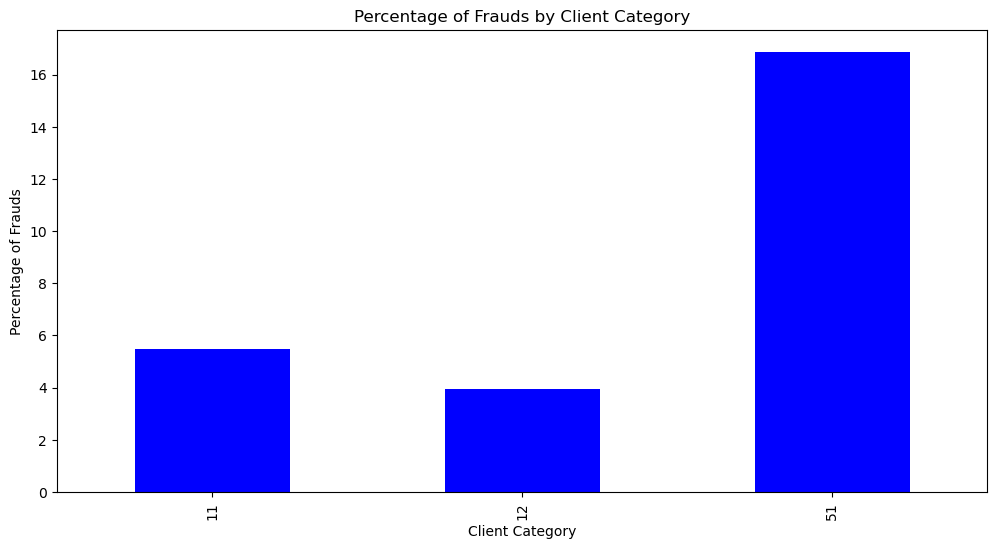

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
fraud_pct.plot(kind="bar", ax=ax, color="blue")
ax.set_xlabel("Client Category")
ax.set_ylabel("Percentage of Frauds")
ax.set_title("Percentage of Frauds by Client Category")
plt.show()